<a href="https://colab.research.google.com/github/ZMLin2020/deeplearning-mindmap/blob/master/lab3_heart_disease_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.load data

In [1]:
import urllib.request
import os

url = "https://storage.googleapis.com/applied-dl/heart.csv"
filepath = "heart.csv"
if not os.path.isfile(filepath):
    result = urllib.request.urlretrieve(url,filepath) #download dataset to filepath
    print("download:",result)
else:
    print("Data file already exists")

download: ('heart.csv', <http.client.HTTPMessage object at 0x7f33262fe208>)


In [0]:
import pandas as pd
import numpy as np
#load data
df_data = pd.read_csv(filepath)

## 2.data preprocessing

In [0]:
selected_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']  #column 'thal' has 5 value(include '1' ,'2')
df_data = df_data[selected_cols]

In [6]:
df_data.isnull().sum() #null detection

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df_data.describe(include=[np.object]) #object description

,thal
count,303
unique,5
top,normal
freq,168


In [0]:
# translate string to int
df_data['thal'] = df_data['thal'].map({'normal':1,'fixed':2,'reversible':3,'1':1,'2':2,'inf':0}).astype(int)

In [0]:
# split dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
train_x, test_x, train_y, test_y = train_test_split(df_data.drop(columns='target'),
                                  df_data['target'],
                                  test_size=0.2,
                                  random_state=10)

## 3.train

In [0]:
#model: random forest
train_score = []
test_score = []

for n in range(1, 100):
    model = RandomForestClassifier(max_depth=5,n_estimators=n,criterion='gini')
    model.fit(train_x, train_y)
    train_score.append(model.score(train_x, train_y))
    test_score.append(model.score(test_x, test_y))

## 4.evaluate

In [12]:
print(model.score(train_x, train_y),model.score(test_x, test_y))

0.9421487603305785 0.8032786885245902


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

pred_y = model.predict(test_x)
# Confusion matrix
confusion_m = confusion_matrix(test_y,pred_y)
total= confusion_m.sum()
tpr = float(confusion_m[0][0]) / (confusion_m[0][0] + confusion_m[1][0])
tnr = float(confusion_m[1][1]) / (confusion_m[1][1] + confusion_m[0][1])
# recall
print(tpr,tnr)

0.8863636363636364 0.5882352941176471


## 5.plot

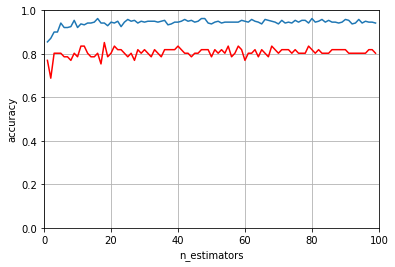

In [14]:
x_axis = [i for i in range(1, 100)]

fig, ax = plt.subplots()
ax.plot(x_axis, train_score[:99])
ax.plot(x_axis, test_score[:99], c="r")
plt.xlim([0, 100])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.grid(True)